In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [3]:
# Load model phù hợp với tiếng Việt
model = SentenceTransformer('VoVanPhuc/sup-SimCSE-VietNamese-phobert-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [24]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/final_data.csv')  # Thay bằng đường dẫn file CSV của bạn

In [25]:
# Tùy chọn: Chọn 1 topic để so sánh
target_topic = 'Đổi mới sáng tạo'
list_other_topics = ['AI', 'Thiết bị' , 'Vũ trụ', 'Chuyển đổi số', 'Thế giới tự nhiên']

In [26]:
# Gom các bài báo theo từng Topic
grouped = df.groupby('Topic')['text'].apply(lambda texts: ' '.join(texts)).to_dict()


# Kiểm tra tồn tại
if target_topic not in grouped:
    raise ValueError(f'Topic "{target_topic}" không có trong dữ liệu.')

available_topics = [t for t in list_other_topics if t in grouped]

# Lấy văn bản
corpus = [grouped[target_topic]] + [grouped[t] for t in available_topics]

In [27]:
# Encode sentence embeddings
embeddings = model.encode(corpus, convert_to_tensor=False)

In [28]:
# Tính cosine similarity giữa target và các topic còn lại
similarities = cosine_similarity([embeddings[0]], embeddings[1:])[0]

In [29]:
df_result = pd.DataFrame({
    "Compared Topic": available_topics,
    f"Similarity with '{target_topic}'": similarities
})

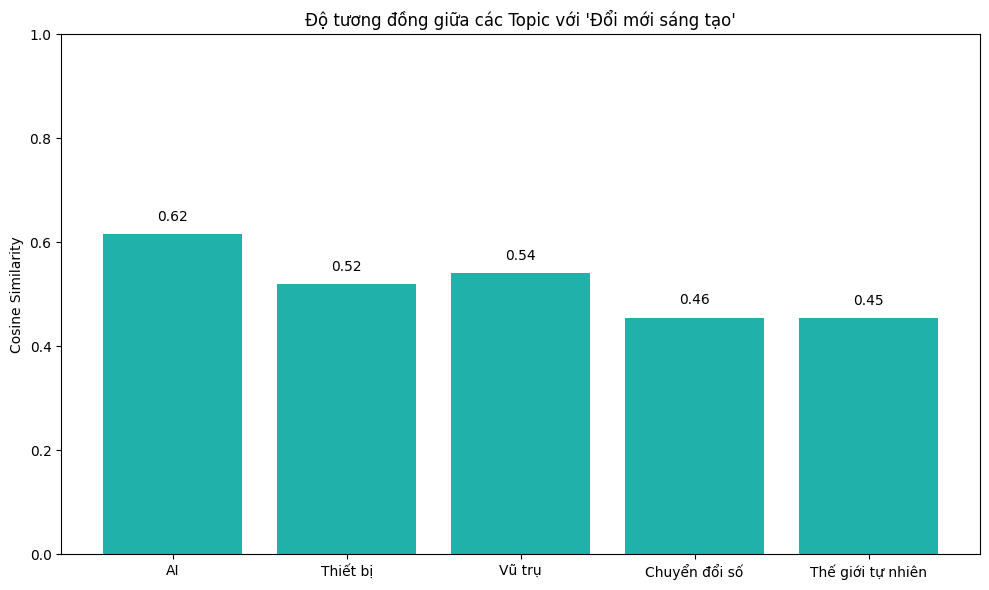

In [30]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(df_result["Compared Topic"], df_result[f"Similarity with '{target_topic}'"], color="lightseagreen")
plt.ylabel("Cosine Similarity")
plt.title(f"Độ tương đồng giữa các Topic với '{target_topic}'")
plt.ylim(0, 1)

# Ghi số trên cột
for bar, sim in zip(bars, similarities):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{sim:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()